# **Initialization**

## **Connecting GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Testing TensorFlow and GPU**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.5.0


## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


# **Multiclass DNN 8020 Random State**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
35820/35820 [==============================] - 108s 3ms/step - loss: 0.0022 - val_loss: 6.7292e-05
Epoch 2/15
35

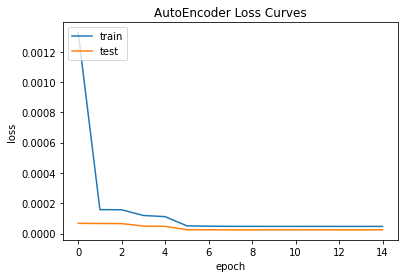

(2292469, 32) (434149, 32)
(2292469, 13) (434149, 13)
Epoch 1/30
35820/35820 [==============================] - 133s 4ms/step - loss: 0.2219 - accuracy: 0.9053 - val_loss: 0.1413 - val_accuracy: 0.9325
Epoch 2/30
35820/35820 [==============================] - 124s 3ms/step - loss: 0.1483 - accuracy: 0.9337 - val_loss: 0.1069 - val_accuracy: 0.9494
Epoch 3/30
35820/35820 [==============================] - 123s 3ms/step - loss: 0.1397 - accuracy: 0.9370 - val_loss: 0.1137 - val_accuracy: 0.9451
Epoch 4/30
35820/35820 [==============================] - 129s 4ms/step - loss: 0.1337 - accuracy: 0.9393 - val_loss: 0.1026 - val_accuracy: 0.9514
Epoch 5/30
35820/35820 [==============================] - 123s 3ms/step - loss: 0.1317 - accuracy: 0.9405 - val_loss: 0.1117 - val_accuracy: 0.9477
Epoch 6/30
35820/35820 [==============================] - 124s 3ms/step - loss: 0.1302 - accuracy: 0.9413 - val_loss: 0.1030 - val_accuracy: 0.9512
Epoch 7/30
35820/35820 [==============================] - 

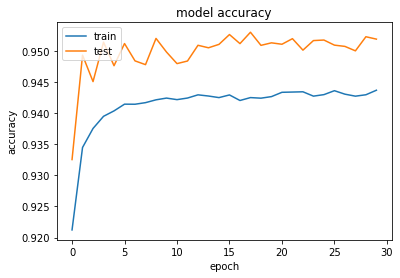

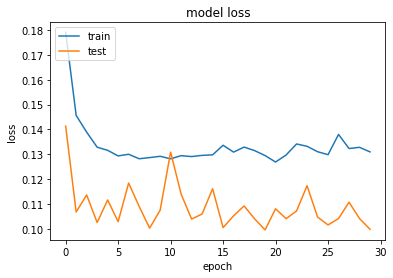

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(439964, 78) (439964,)
(439964, 32) (439964, 13)
13749/13749 [==============================] - 31s 2ms/step - loss: 0.1118 - accuracy: 0.9490


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.61      0.65      0.63      2000
           2       0.86      0.79      0.82      2000
           3       1.00      1.00      1.00    137203
           4       1.00      1.00      1.00       346
           5       0.92      1.00      0.95      8302
           6       1.00      0.99      1.00     92382
           7       0.74      0.53      0.61     27978
           8       0.89      0.99      0.93      2198
           9       0.72      0.86      0.78     38671
          10       1.00      0.94      0.97     32128
          11       0.69      0.71      0.70      2000
          12       0.98      1.00      0.99     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.88      0.88      0.88    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964

[[ 57211      1      0   

In [ ]:
## Loading the Dataset
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)

## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

#### Defining Autoencoder ####
#### Defining the AutoEncoder Model ####
# 78 -> 64 -> 32 -> 64 -> 78 #

#### INPUT Layer ####
input_layer = Input(shape=(78,))
#### Encoder Layer - 64 ####
encoded_layer = Dense(64, activation='relu')(input_layer)
#### BottleNeck ####
bottleneck = Dense(32, activation='relu')(encoded_layer)
#### Decoder Layer - 64 ####
decoded_layer = Dense(64, activation='relu')(bottleneck)
#### OutPut Layer ####
output_layer = Dense(78, activation='relu')(decoded_layer)

AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
AutoEncoder.summary()
AutoEncoder.compile(optimizer='rmsprop', loss='mse')
with tf.device('/device:GPU:0'):
  AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=15, validation_data=(X_test, X_test))
# AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

print(AutoEncoder_History.history.keys())
# summarize history for loss
plt.plot(AutoEncoder_History.history['loss'])
plt.plot(AutoEncoder_History.history['val_loss'])
plt.title('AutoEncoder Loss Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
# encoder.summary()

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
# model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTEUpdatedNew.h5')

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Generating Predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Converting to Numpy Arrays
Y_test = np.array(Y_test)

## SMOTE for Test Samples
from imblearn.over_sampling import SMOTE
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_test.shape, Y_test.shape)
Y_test = np.array(Y_test)

## Converting Output Labels to Sparse Format
Y_test = to_categorical(Y_test)

# ## Loading the AutoEncoder for Compressing Test Data
# AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')
# AutoEncoder.evaluate(X_test, X_test)

# ## Extracting the Encoder Module
# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])

## Encoding the Testing Data
X_test_encoded = encoder.predict(X_test)
print(X_test_encoded.shape, Y_test.shape)
## Evaluating Model
model.evaluate(X_test_encoded, Y_test)

## Generating Predictions
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)

## Generating Classification Report on the Predicted vs Actual Value
print(classification_report(Y_test, Y_predicted))

## Generating the Confusion Matrix
cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)